In [1]:
# dataset from https://storage.teklia.com/public/rimes2011/RIMES-2011-Lines.zip
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
def file_to_list(dir_path):
    '''
    Read all files in a folder.
    Return their content as a list of strings.
    '''
    text = []
    for file_name in os.listdir(dir_path):
        file_path = os.path.join(dir_path, file_name)
        if os.path.isfile(file_path):
            try:
                with open(file_path, 'r', encoding='utf-8') as f:
                    line = f.readlines()
                    text.extend(line)
            except Exception as e:
                print(f'File read error {file_name}: {e}')
    return text

In [3]:
dir_path = 'Transcriptions'
texts = file_to_list(dir_path)

In [4]:
print(f'Number of data: {len(texts)}')

Number of data: 12104


In [5]:
# create dataframe and add new columns
df = pd.DataFrame(texts, columns=['text'])
df['char_count'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split(' ')))

In [6]:
print(df)

                                                    text  char_count  \
0      Comme indiqué dans les conditions particulière...          74   
1      habitation n° DPUET36, je souhaite vous faire ...          77   
2      de mon domicile du 3 Rue Gambetta, 57000 METZ,...          68   
3                                                  2007.           5   
4      Je souhaite donc que vous procédiez à la résil...          67   
...                                                  ...         ...   
12099               vous prie de bien vouloir prendre en          36   
12100         compte mes nouvelles coordonnées bancaires          42   
12101                                      Ci-joint RIB.          13   
12102             Je vous en remercie par avance et vous          38   
12103         prie d'accepter mes meilleures salutations          42   

       word_count  
0              10  
1              12  
2              14  
3               1  
4              12  
...           .

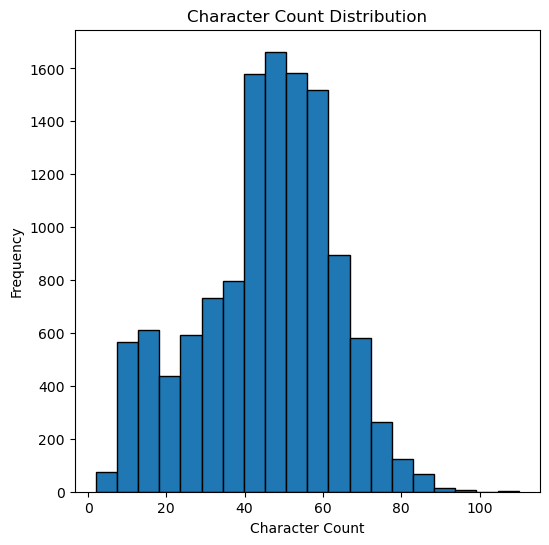

In [7]:
# plot graphs
plt.figure(figsize=(6, 6))
plt.hist(df['char_count'], bins=20, edgecolor='black')
plt.title('Character Count Distribution')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

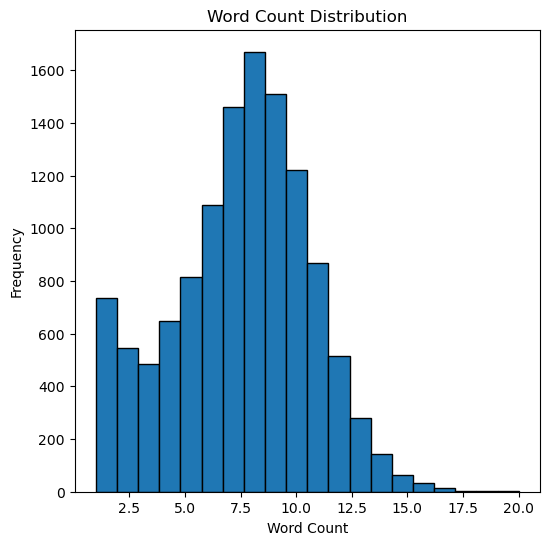

In [8]:
plt.figure(figsize=(6, 6))
plt.hist(df['word_count'], bins=20, edgecolor='black')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

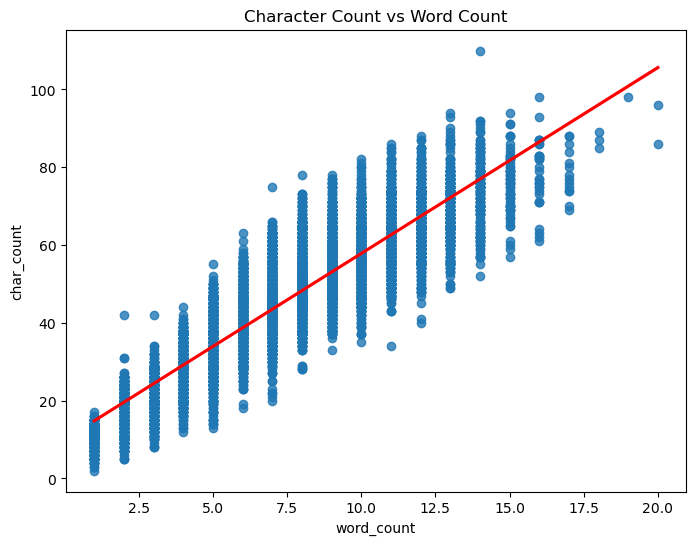

In [9]:
plt.figure(figsize=(8, 6))
sns.regplot(x='word_count', y='char_count', data=df, line_kws={'color': 'red'})
plt.title('Character Count vs Word Count')
plt.show()

In [10]:
text = ''.join(texts)
chars = pd.Series(list(text)).value_counts()
words = pd.Series(text.split()).value_counts()

In [11]:
print(f'Number of unique characters: {len(chars)}')
print(f'Number of unique words: {len(words)}')

Number of unique characters: 100
Number of unique words: 14328


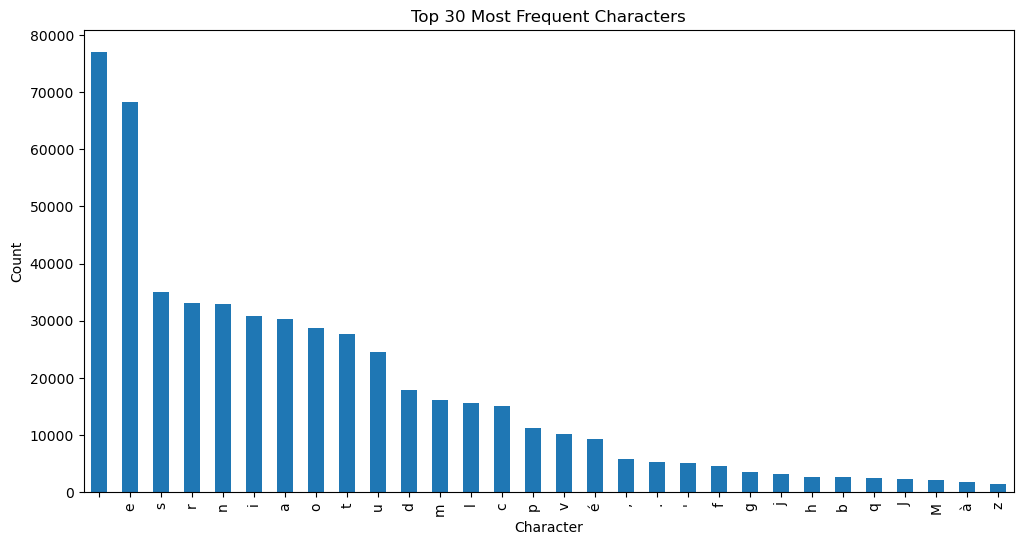

In [12]:
nchar = 30
plt.figure(figsize=(12, 6))
chars.head(nchar).plot(kind='bar')
plt.title(f'Top {nchar} Most Frequent Characters')
plt.xlabel('Character')
plt.ylabel('Count')
plt.show()

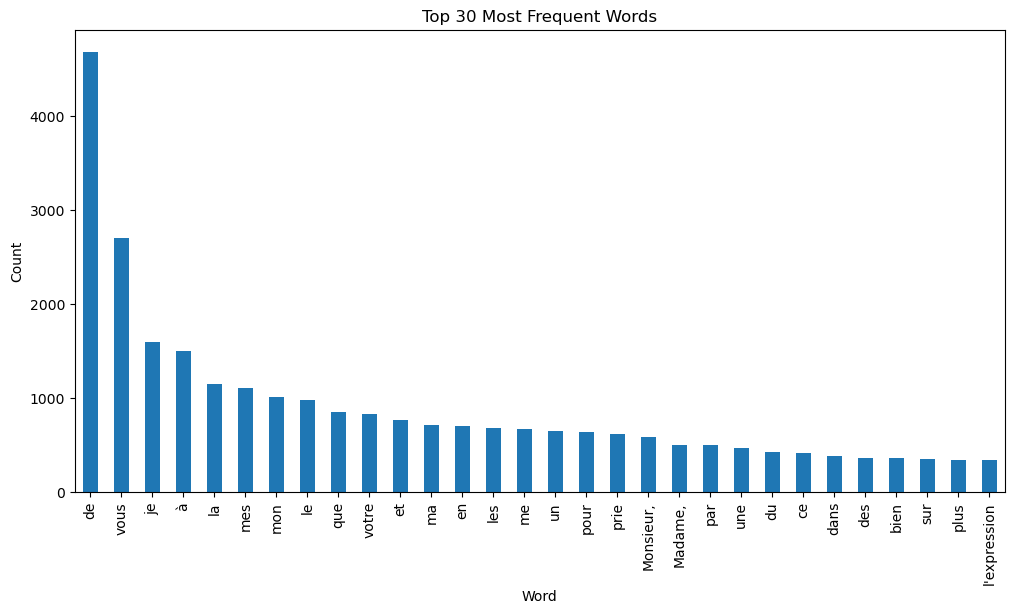

In [13]:
nword = 30
words.head(nword).plot(kind='bar', figsize=(12, 6))
plt.title(f'Top {nword} Most Frequent Words')
plt.xlabel('Word')
plt.ylabel('Count')
plt.show()